In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
import time
from datetime import datetime

In [2]:
lokal = pd.read_csv("data/lokal.csv", dtype={
    "Udzial": str,
    "Ilosc_izb": str,
    "Data_dokumentu": str,
    "Wyposazenie_lokalu": str 
})

In [3]:
lokal.head()

,RCIWN,Adres,Dzielnica,Obreb,Dzialka_lokal,Udzial,Udzial0,Cena,Funkcja_podstawowa,Funkcja_drugorzedna,...,Ilosc_izb,Pow_pom_przy,Pomieszczenia_przynalezne,Prawo_do_lokalu,Material_scian,Wyposazenie_lokalu,Kondygnacja,Procent_zuzycia,Rok_budowy,Uwagi
0,45/2008,KRÓLEWSKA 92/78 KRAKÓW,Krowodrza,3,78,1.0000000000,1/1,240000.00,Mieszkalne,NaN,...,2,NaN,piwnica-1,własn. obciąż. hip.,NaN,NaN,5.0,NaN,NaN,NaN
1,228/2008,FELIKSA KONECZNEGO 2/96 KRAKÓW,Krowodrza,44,96,1.0000000000,1/1,600000.00,Mieszkalne,NaN,...,3,NaN,NaN,własność,NaN,NaN,4.0,NaN,NaN,NaN
2,228/2008,FELIKSA KONECZNEGO 2/G9 KRAKÓW,Krowodrza,44,G9,1.0000000000,1/1,30000.00,Niemieszkalne,Garaż,...,1,NaN,NaN,własność,NaN,NaN,0.0,NaN,NaN,NaN
3,230/2008,GEN. AUGUSTA FIELDORFA-NILA 15/62 KRAKÓW,Krowodrza,44,62,1.0000000000,1/1,NaN,Mieszkalne,NaN,...,2,NaN,komórka-1,własn. obciąż. hip.,NaN,NaN,NaN,NaN,NaN,NaN
4,790/2008,DAJWÓR 25/16 KRAKÓW,Śródmieście,12,16,1.0000000000,1/1,90000.00,Mieszkalne,NaN,...,2,NaN,NaN,własność,NaN,NaN,3.0,NaN,NaN,NaN


In [4]:
del lokal["Dzielnica"]
del lokal["Obreb"]
del lokal["Dzialka_lokal"]
del lokal["Udzial0"]
del lokal["Wyposazenie_lokalu"]
del lokal["Uwagi"]
del lokal["Material_scian"]
del lokal["Procent_zuzycia"]
del lokal["Rok_budowy"]
del lokal["Pomieszczenia_przynalezne"]
del lokal["Funkcja_drugorzedna"]
del lokal["Prawo_do_lokalu"]

In [5]:
lokal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137723 entries, 0 to 137722
Data columns (total 9 columns):
RCIWN                 137723 non-null object
Adres                 134123 non-null object
Udzial                136976 non-null object
Cena                  132180 non-null object
Funkcja_podstawowa    134983 non-null object
Pow_uzytkowa          132240 non-null object
Ilosc_izb             115728 non-null object
Pow_pom_przy          23285 non-null float64
Kondygnacja           127997 non-null float64
dtypes: float64(2), object(7)
memory usage: 9.5+ MB


In [6]:
transaction = pd.read_csv("data/transaction.csv")

In [7]:
transaction.head()

,RCIWN,Nr_przetargu,Sprzedal,Kupil,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Zrodlo_informacji,Oznacznie_dokumentu,Data_dokumentu,Ulokowanie_dokumentu,Rodzaj_nieruchomosci,Rodzaj_ Uz_gruntowego,Ksiega_wieczysta
0,36/2008,NaN,Osoba fizyczna,Osoba fizyczna,Wolny rynek,320000,320000.00,akt not.,Rep A Nr 1201/2008,2008.01.19,K29/14/08,Niezabudowana nieruchomość jednoużytkowa rolna...,grunty orne,NaN
1,45/2008,NaN,Osoba fizyczna,Osoba fizyczna,Wolny rynek,240000,240000.00,akt not.,Rep A Nr 1220/2008,2008.01.25,K3/20/08,Nieruchomość lokalowa,NaN,NaN
2,228/2008,NaN,Osoba fizyczna,Osoba fizyczna,Wolny rynek,630000,630000.00,akt not.,Rep A Nr 267/2008,2008.01.14,K44/126/08,Nieruchomość lokalowa,NaN,NaN
3,230/2008,NaN,Osoba fizyczna,Osoba fizyczna,Wolny rynek,270000,270000.00,akt not.,Rep A Nr 1007/2008,2008.01.11,K44/128/08,Nieruchomość lokalowa,NaN,NaN
4,231/2008,NaN,Spółdzielnia,Osoba fizyczna,Wolny rynek,68889.77,68889.77,akt not.,Rep A Nr 402/2008,2008.01.11,K44/129/08,Niezabudowana nieruchomość przeznaczona pod za...,NaN,NaN


In [8]:
transaction.shape

(137342, 14)

In [9]:
del transaction["Ksiega_wieczysta"]
del transaction["Rodzaj_ Uz_gruntowego"]
del transaction["Nr_przetargu"]
del transaction["Ulokowanie_dokumentu"]
del transaction["Oznacznie_dokumentu"]
del transaction["Zrodlo_informacji"]
del transaction["Sprzedal"]
del transaction["Kupil"]
del transaction["Rodzaj_nieruchomosci"]

In [10]:
transaction.head()

,RCIWN,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,36/2008,Wolny rynek,320000,320000.00,2008.01.19
1,45/2008,Wolny rynek,240000,240000.00,2008.01.25
2,228/2008,Wolny rynek,630000,630000.00,2008.01.14
3,230/2008,Wolny rynek,270000,270000.00,2008.01.11
4,231/2008,Wolny rynek,68889.77,68889.77,2008.01.11


In [11]:
data = pd.merge(lokal, transaction, on="RCIWN", how="outer")
del data["RCIWN"]

In [12]:
data.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,KRÓLEWSKA 92/78 KRAKÓW,1.0000000000,240000.00,Mieszkalne,29.00,2,NaN,5.0,Wolny rynek,240000,240000.0,2008.01.25
1,FELIKSA KONECZNEGO 2/96 KRAKÓW,1.0000000000,600000.00,Mieszkalne,81.00,3,NaN,4.0,Wolny rynek,630000,630000.0,2008.01.14
2,FELIKSA KONECZNEGO 2/G9 KRAKÓW,1.0000000000,30000.00,Niemieszkalne,29.00,1,NaN,0.0,Wolny rynek,630000,630000.0,2008.01.14
3,GEN. AUGUSTA FIELDORFA-NILA 15/62 KRAKÓW,1.0000000000,NaN,Mieszkalne,NaN,2,NaN,NaN,Wolny rynek,270000,270000.0,2008.01.11
4,DAJWÓR 25/16 KRAKÓW,1.0000000000,90000.00,Mieszkalne,30.49,2,NaN,3.0,Wolny rynek,90000,90000.0,2008.01.24


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160503 entries, 0 to 160502
Data columns (total 12 columns):
Adres                          134203 non-null object
Udzial                         137056 non-null object
Cena                           132228 non-null object
Funkcja_podstawowa             135063 non-null object
Pow_uzytkowa                   132288 non-null object
Ilosc_izb                      115800 non-null object
Pow_pom_przy                   23309 non-null float64
Kondygnacja                    128077 non-null float64
Forma_transakcji_cel_wyceny    159556 non-null object
Cena_wartosc_calkowita         158516 non-null object
Cena_wartosc_nieruchomosci     156104 non-null float64
Data_dokumentu                 158036 non-null object
dtypes: float64(3), object(9)
memory usage: 15.9+ MB


In [14]:
data.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,KRÓLEWSKA 92/78 KRAKÓW,1.0000000000,240000.00,Mieszkalne,29.00,2,NaN,5.0,Wolny rynek,240000,240000.0,2008.01.25
1,FELIKSA KONECZNEGO 2/96 KRAKÓW,1.0000000000,600000.00,Mieszkalne,81.00,3,NaN,4.0,Wolny rynek,630000,630000.0,2008.01.14
2,FELIKSA KONECZNEGO 2/G9 KRAKÓW,1.0000000000,30000.00,Niemieszkalne,29.00,1,NaN,0.0,Wolny rynek,630000,630000.0,2008.01.14
3,GEN. AUGUSTA FIELDORFA-NILA 15/62 KRAKÓW,1.0000000000,NaN,Mieszkalne,NaN,2,NaN,NaN,Wolny rynek,270000,270000.0,2008.01.11
4,DAJWÓR 25/16 KRAKÓW,1.0000000000,90000.00,Mieszkalne,30.49,2,NaN,3.0,Wolny rynek,90000,90000.0,2008.01.24


In [15]:
# def map_location(row):
#     address = row["Adres"]
#     g = geocoder.osm(address)
#     print(g.latlng)
#     time.sleep(0.2)
#     return g.latlng

# def index_marks(nrows, chunk_size):
#     return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)

# def split(dfm, chunk_size):
#     indices = index_marks(dfm.shape[0], chunk_size)
#     return np.split(dfm, indices)

# chunks = split(data, 100)
# print(len(chunks))

# for index, c in enumerate(chunks):
#     c["lat_lng"] = c.apply(lambda row: map_location(row), axis=1)
#     template = Template('data/processed-$index.csv')
#     file_path = template.substitute(index=index)
#     c.to_csv(file_path)

In [16]:
def cleanup(data):
    important = [
        "Adres",
        "Cena",
        "Pow_uzytkowa",
        "Data_dokumentu"
    ]
    return data.dropna(subset=important)

data = cleanup(data)
data.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,KRÓLEWSKA 92/78 KRAKÓW,1.0000000000,240000.00,Mieszkalne,29.00,2,NaN,5.0,Wolny rynek,240000,240000.0,2008.01.25
1,FELIKSA KONECZNEGO 2/96 KRAKÓW,1.0000000000,600000.00,Mieszkalne,81.00,3,NaN,4.0,Wolny rynek,630000,630000.0,2008.01.14
2,FELIKSA KONECZNEGO 2/G9 KRAKÓW,1.0000000000,30000.00,Niemieszkalne,29.00,1,NaN,0.0,Wolny rynek,630000,630000.0,2008.01.14
4,DAJWÓR 25/16 KRAKÓW,1.0000000000,90000.00,Mieszkalne,30.49,2,NaN,3.0,Wolny rynek,90000,90000.0,2008.01.24
5,MARII I BOLESŁAWA WYSŁOUCHÓW 51A/10 KRAKÓW,1.0000000000,398000.00,Mieszkalne,50.77,NaN,NaN,0.0,Wolny rynek,398000,398000.0,2008.01.14


In [17]:
data.describe()

,Pow_pom_przy,Kondygnacja,Cena_wartosc_nieruchomosci
count,22160.000000,122429.000000,1.238660e+05
mean,5.536546,2.555899,3.383440e+05
std,11.534412,3.788961,5.848770e+06
min,0.000000,-14.000000,0.000000e+00
25%,2.280000,1.000000,1.857736e+05
50%,3.300000,2.000000,2.741090e+05
75%,5.430000,4.000000,3.739981e+05
max,1140.000000,851.000000,2.051494e+09


In [18]:
data["Data_dokumentu"] = data["Data_dokumentu"].apply(lambda row: pd.to_datetime(row, errors="ignore"))

In [19]:
data.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,KRÓLEWSKA 92/78 KRAKÓW,1.0000000000,240000.00,Mieszkalne,29.00,2,NaN,5.0,Wolny rynek,240000,240000.0,2008-01-25 00:00:00
1,FELIKSA KONECZNEGO 2/96 KRAKÓW,1.0000000000,600000.00,Mieszkalne,81.00,3,NaN,4.0,Wolny rynek,630000,630000.0,2008-01-14 00:00:00
2,FELIKSA KONECZNEGO 2/G9 KRAKÓW,1.0000000000,30000.00,Niemieszkalne,29.00,1,NaN,0.0,Wolny rynek,630000,630000.0,2008-01-14 00:00:00
4,DAJWÓR 25/16 KRAKÓW,1.0000000000,90000.00,Mieszkalne,30.49,2,NaN,3.0,Wolny rynek,90000,90000.0,2008-01-24 00:00:00
5,MARII I BOLESŁAWA WYSŁOUCHÓW 51A/10 KRAKÓW,1.0000000000,398000.00,Mieszkalne,50.77,NaN,NaN,0.0,Wolny rynek,398000,398000.0,2008-01-14 00:00:00


In [20]:
def to_mean(field):
    data[field] = data[field].apply(lambda row: pd.to_numeric(row, errors="coerce"))
    data[field].fillna((data[field].mean()), inplace=True)
    
to_mean("Ilosc_izb")
to_mean("Kondygnacja")
to_mean("Cena")
to_mean("Pow_uzytkowa")
to_mean("Cena_wartosc_calkowita")

In [21]:
def fillna_with(value, field):
    data[field] = data[field].apply(lambda row: pd.to_numeric(row, errors="coerce"))
    data[field].fillna(value, inplace=True)
    
fillna_with(0, "Pow_pom_przy")
fillna_with(1, "Udzial")

In [22]:
data.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu
0,KRÓLEWSKA 92/78 KRAKÓW,1.0,240000.0,Mieszkalne,29.00,2.000000,0.0,5.0,Wolny rynek,240000.0,240000.0,2008-01-25 00:00:00
1,FELIKSA KONECZNEGO 2/96 KRAKÓW,1.0,600000.0,Mieszkalne,81.00,3.000000,0.0,4.0,Wolny rynek,630000.0,630000.0,2008-01-14 00:00:00
2,FELIKSA KONECZNEGO 2/G9 KRAKÓW,1.0,30000.0,Niemieszkalne,29.00,1.000000,0.0,0.0,Wolny rynek,630000.0,630000.0,2008-01-14 00:00:00
4,DAJWÓR 25/16 KRAKÓW,1.0,90000.0,Mieszkalne,30.49,2.000000,0.0,3.0,Wolny rynek,90000.0,90000.0,2008-01-24 00:00:00
5,MARII I BOLESŁAWA WYSŁOUCHÓW 51A/10 KRAKÓW,1.0,398000.0,Mieszkalne,50.77,2.561552,0.0,0.0,Wolny rynek,398000.0,398000.0,2008-01-14 00:00:00


In [23]:
import re
def adjustAddress(adres):
    return re.sub(r"\/.+\s", " ", adres)

data["Adres"] = data["Adres"].apply(adjustAddress)

<function seaborn.utils.despine>

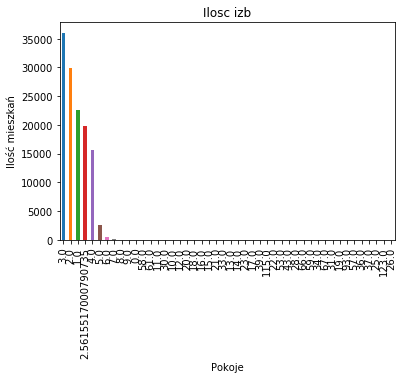

In [24]:
data["Ilosc_izb"].value_counts().plot(kind="bar")
plt.title("Ilosc izb")
plt.xlabel("Pokoje")
plt.ylabel("Ilość mieszkań")
sns.despine

In [25]:
lokalizacje = pd.read_csv("data/lokalizacje.csv", sep=";")

In [26]:
lokalizacje.head()

,pid,miejscowosc,ulica,numer,xwsch,ypoln
0,4EAF9C5D413E4BCFB8E0000856420040,Kraków,Rędzina,1F,559423.7929,242746.4309
1,4EAF9C5D413E4BCFB8E0000856430040,Kraków,Rędzina,1G,559443.0985,242748.1800
2,4EAF9C5D413E4BCFB8E0000822390040,Kraków,Rędzina,1A,559445.8186,242726.1230
3,4EAF9C5D413E4BCFB8E0000822500040,Kraków,Rędzina,1,559426.7217,242724.2169
4,4EAF9C5D413E4BCFB8E0000823130040,Kraków,Rędzina,2,559374.2177,242696.2148


In [27]:
lokalizacje["Adres"] = lokalizacje["ulica"] + " " + lokalizacje["numer"] + " " + lokalizacje["miejscowosc"]

In [28]:
lokalizacje["Adres"] = lokalizacje["Adres"].apply(lambda row: row.upper())
del lokalizacje["pid"]
del lokalizacje["ulica"]
del lokalizacje["numer"]
del lokalizacje["miejscowosc"]
lokalizacje.head()

,xwsch,ypoln,Adres
0,559423.7929,242746.4309,RĘDZINA 1F KRAKÓW
1,559443.0985,242748.1800,RĘDZINA 1G KRAKÓW
2,559445.8186,242726.1230,RĘDZINA 1A KRAKÓW
3,559426.7217,242724.2169,RĘDZINA 1 KRAKÓW
4,559374.2177,242696.2148,RĘDZINA 2 KRAKÓW


### xwsch/ypoln wyrażone są w tzw. układzie 92 
(PUWG 1992 https://pl.wikipedia.org/wiki/Uk%C5%82ad_wsp%C3%B3%C5%82rz%C4%99dnych_1992)

In [42]:
with_coords = data.merge(lokalizacje, on="Adres")
with_coords.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu,xwsch,ypoln
0,KRÓLEWSKA 92 KRAKÓW,1.0,240000.0,Mieszkalne,29.00,2.000000,0.0,5.000000,Wolny rynek,240000.0,240000.0,2008-01-25 00:00:00,565259.3992,245541.8591
1,KRÓLEWSKA 92 KRAKÓW,1.0,250000.0,Mieszkalne,28.43,1.000000,0.0,3.000000,Wolny rynek,250000.0,250000.0,2008-09-16 00:00:00,565259.3992,245541.8591
2,KRÓLEWSKA 92 KRAKÓW,1.0,290000.0,Mieszkalne,28.43,2.000000,0.0,4.000000,Wolny rynek,290000.0,290000.0,2008-09-02 00:00:00,565259.3992,245541.8591
3,KRÓLEWSKA 92 KRAKÓW,1.0,223000.0,Mieszkalne,28.58,2.561552,0.0,2.555899,Wolny rynek,223000.0,223000.0,2008-08-29 00:00:00,565259.3992,245541.8591
4,KRÓLEWSKA 92 KRAKÓW,1.0,140000.0,Mieszkalne,28.15,1.000000,0.0,4.000000,Wolny rynek,140000.0,140000.0,2009-02-09 00:00:00,565259.3992,245541.8591


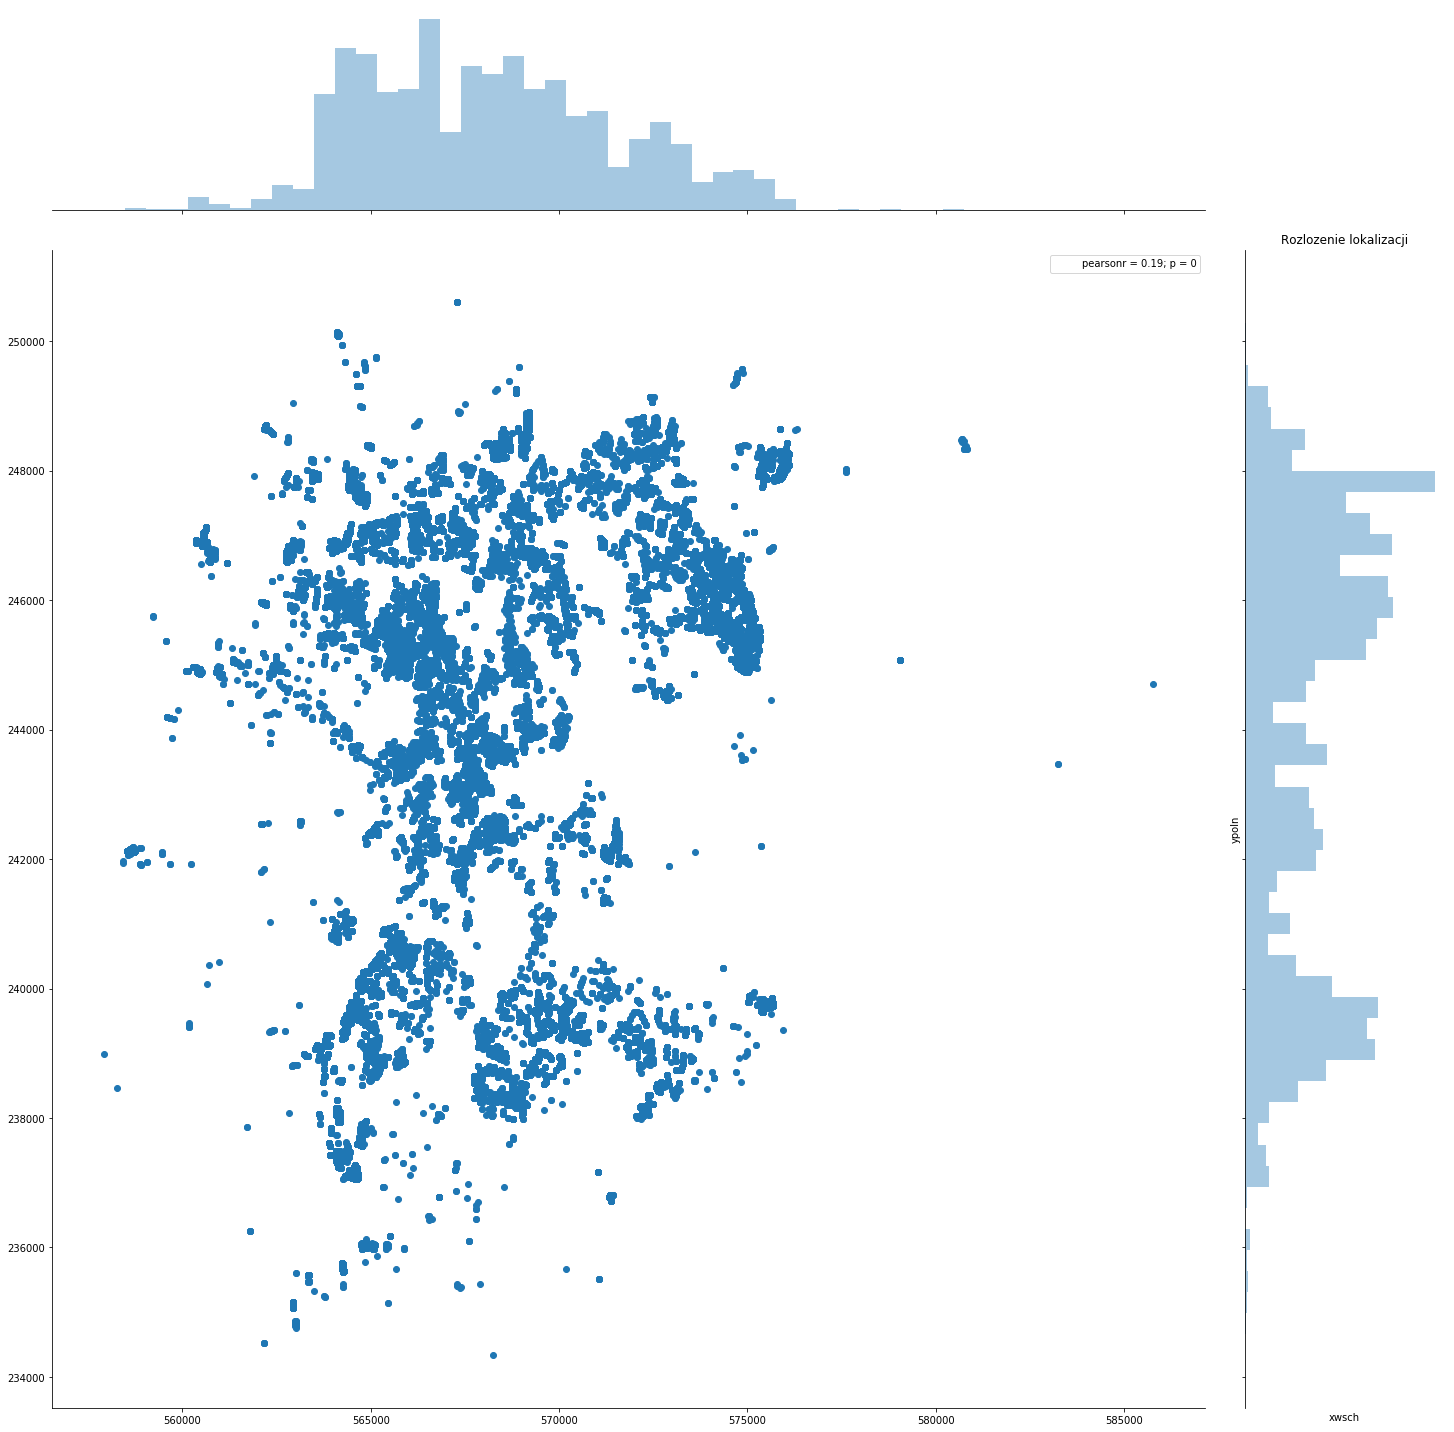

<function seaborn.utils.despine>

In [43]:
plt.figure(figsize=(20,20))
sns.jointplot(x=with_coords["xwsch"].values, y=with_coords["ypoln"].values, size=20)
plt.title("Rozlozenie lokalizacji")
plt.xlabel("xwsch")
plt.ylabel("ypoln")
plt.show()
sns.despine

In [44]:
with_coords.head()

,Adres,Udzial,Cena,Funkcja_podstawowa,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Forma_transakcji_cel_wyceny,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,Data_dokumentu,xwsch,ypoln
0,KRÓLEWSKA 92 KRAKÓW,1.0,240000.0,Mieszkalne,29.00,2.000000,0.0,5.000000,Wolny rynek,240000.0,240000.0,2008-01-25 00:00:00,565259.3992,245541.8591
1,KRÓLEWSKA 92 KRAKÓW,1.0,250000.0,Mieszkalne,28.43,1.000000,0.0,3.000000,Wolny rynek,250000.0,250000.0,2008-09-16 00:00:00,565259.3992,245541.8591
2,KRÓLEWSKA 92 KRAKÓW,1.0,290000.0,Mieszkalne,28.43,2.000000,0.0,4.000000,Wolny rynek,290000.0,290000.0,2008-09-02 00:00:00,565259.3992,245541.8591
3,KRÓLEWSKA 92 KRAKÓW,1.0,223000.0,Mieszkalne,28.58,2.561552,0.0,2.555899,Wolny rynek,223000.0,223000.0,2008-08-29 00:00:00,565259.3992,245541.8591
4,KRÓLEWSKA 92 KRAKÓW,1.0,140000.0,Mieszkalne,28.15,1.000000,0.0,4.000000,Wolny rynek,140000.0,140000.0,2009-02-09 00:00:00,565259.3992,245541.8591


In [47]:
with_coords["Cena_Udzial"] = with_coords["Cena"] * with_coords["Udzial"].abs()
with_coords.describe()

,Udzial,Cena,Pow_uzytkowa,Ilosc_izb,Pow_pom_przy,Kondygnacja,Cena_wartosc_calkowita,Cena_wartosc_nieruchomosci,xwsch,ypoln,Cena_Udzial
count,109919.000000,1.099190e+05,109919.000000,109919.000000,109919.000000,109919.000000,1.099190e+05,1.069290e+05,109919.000000,109919.000000,1.099190e+05
mean,0.820092,2.459845e+05,386.040718,2.591584,0.944751,2.608778,3.235863e+05,3.229114e+05,568142.028143,243794.376831,2.410187e+05
std,0.392249,2.971976e+05,1127.089687,1.755498,5.357695,2.864514,5.032657e+05,5.012356e+05,3266.135614,3374.622042,2.999447e+05
min,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,-14.000000,0.000000e+00,0.000000e+00,557933.716300,234335.803200,0.000000e+00
25%,1.000000,9.024155e+04,37.860000,2.000000,0.000000,1.000000,1.900000e+05,1.875620e+05,565580.407900,240309.880400,7.800000e+04
50%,1.000000,2.300000e+05,51.250000,2.561552,0.000000,2.000000,2.753810e+05,2.730000e+05,567911.660900,244822.086300,2.300000e+05
75%,1.000000,3.240425e+05,73.315000,3.000000,0.000000,4.000000,3.700000e+05,3.722000e+05,570373.505800,246722.163800,3.236094e+05
max,11.000000,2.663581e+07,36000.000000,115.000000,1140.000000,362.600000,3.648596e+07,3.833379e+07,585760.244700,250602.616100,2.663581e+07


In [50]:
final = with_coords[['Pow_uzytkowa', 'Pow_pom_przy', 'Ilosc_izb', 'Kondygnacja', 'xwsch', 'ypoln', 'Cena_Udzial']].copy()
final.to_csv("data/dataset.csv")

### TODO

- cena w oparciu o udzialy
- walidacja krzyzowa (10 podzbiorow) lub 70% (uczacy) do 30% (testowy)
- biblioteka - libsvm (readme, svmtrain, svmpredict), klasyfikator - svm, typ - epsilon-SVR (parametr - epsilon) lub nu-SVR (parametr - nu: 0.5, 0.4, 0.3, 0.2, 0.1, 0.08, 0.06, 0.04, 0.02, 0.01), funkcja jadra - RBF (parametr - gamma: 0.8, 0.5, 0.3, 0.2, 0.1, 0.08, 0.06, 0.04, 0.02, 0.01)
- ocena - blad wzgledny